In [1]:
import boto3
import os


In [22]:

# Specify the region_name parameter
s3 = boto3.client('s3', region_name='us-east-1')  # example region
comprehend = boto3.client('comprehend', region_name='us-east-1')


In [23]:
bucket_name = "anastasiia-de2-ceu-bucket"
prefix = "ts/"

# List objects in the S3 prefix
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
lyrics_files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.txt')]


In [24]:
lyrics_files

['ts/2006 - Taylor Swift/A Perfectly Good Heart.txt',
 'ts/2006 - Taylor Swift/A Place In This World.txt',
 'ts/2006 - Taylor Swift/Cold As You.txt',
 "ts/2006 - Taylor Swift/I'm Only Me When I'm With You.txt",
 'ts/2006 - Taylor Swift/Invisible.txt',
 "ts/2006 - Taylor Swift/Mary's Song (Oh My My My).txt",
 'ts/2006 - Taylor Swift/Our Song.txt',
 'ts/2006 - Taylor Swift/Picture To Burn.txt',
 "ts/2006 - Taylor Swift/Should've Said No.txt",
 'ts/2006 - Taylor Swift/Stay Beautiful.txt',
 'ts/2006 - Taylor Swift/Teardrops On My Guitar.txt',
 'ts/2006 - Taylor Swift/The Outside.txt',
 'ts/2006 - Taylor Swift/Tied Together With A Smile.txt',
 'ts/2006 - Taylor Swift/Tim McGraw.txt',
 'ts/2017 - Reputation/...Ready For It?.txt',
 'ts/2017 - Reputation/Call It What You Want.txt',
 'ts/2017 - Reputation/Dancing With Our Hands Tied.txt',
 'ts/2017 - Reputation/Delicate.txt',
 "ts/2017 - Reputation/Don't Blame Me.txt",
 'ts/2017 - Reputation/Dress.txt',
 'ts/2017 - Reputation/End Game.txt',
 't

In [25]:
import json

results = []

print("Number of files to process:", len(lyrics_files))
print("First few files:", lyrics_files[:5])  # Check a sample of the file list

for key in lyrics_files:
    print(f"Processing file: {key}")
    # Fetch the lyrics file content from S3
    try:
        obj = s3.get_object(Bucket=bucket_name, Key=key)
        lyrics_text = obj['Body'].read().decode('utf-8', errors='replace').strip()
    except Exception as e:
        print(f"Error reading {key}: {e}")
        continue
    
    # Check if lyrics_text is empty or too short
    if not lyrics_text:
        print(f"Warning: {key} is empty or contains no readable text.")
        continue
    
    # Print a snippet of the text to confirm it's different
    snippet = lyrics_text[:100].replace('\n', ' ')
    print(f"Snippet of lyrics for {key}: {snippet}...")
    
    # Detect sentiment
    sentiment_response = comprehend.detect_sentiment(Text=lyrics_text, LanguageCode='en')
    sentiment = sentiment_response['Sentiment']
    sentiment_scores = sentiment_response['SentimentScore']
    
    # Detect key phrases
    key_phrases_response = comprehend.detect_key_phrases(Text=lyrics_text, LanguageCode='en')
    key_phrases = [kp['Text'] for kp in key_phrases_response['KeyPhrases']]
    
    # Detect entities
    entities_response = comprehend.detect_entities(Text=lyrics_text, LanguageCode='en')
    entities = [(ent['Text'], ent['Type']) for ent in entities_response['Entities']]
    
    # Store the analysis result for this file
    results.append({
        "file_name": key,
        "sentiment": sentiment,
        "sentiment_scores": sentiment_scores,
        "key_phrases": key_phrases,
        "entities": entities
    })

print("\nFinal Results:")
print(json.dumps(results, indent=4))


Number of files to process: 232
First few files: ['ts/2006 - Taylor Swift/A Perfectly Good Heart.txt', 'ts/2006 - Taylor Swift/A Place In This World.txt', 'ts/2006 - Taylor Swift/Cold As You.txt', "ts/2006 - Taylor Swift/I'm Only Me When I'm With You.txt", 'ts/2006 - Taylor Swift/Invisible.txt']
Processing file: ts/2006 - Taylor Swift/A Perfectly Good Heart.txt
Snippet of lyrics for ts/2006 - Taylor Swift/A Perfectly Good Heart.txt: Why would you wanna break A perfectly good heart? Why would you wanna take Our love and tear it all ...
Processing file: ts/2006 - Taylor Swift/A Place In This World.txt
Snippet of lyrics for ts/2006 - Taylor Swift/A Place In This World.txt: I don't know what I want, so don't ask me 'Cause I'm still trying to figure it out Don't know what's...
Processing file: ts/2006 - Taylor Swift/Cold As You.txt
Snippet of lyrics for ts/2006 - Taylor Swift/Cold As You.txt: You have a way of coming easily to me And when you take, you take the very best of me So I start a 

DataFrame head:
                                           file_name sentiment  \
0  ts/2006 - Taylor Swift/A Perfectly Good Heart.txt  NEGATIVE   
1   ts/2006 - Taylor Swift/A Place In This World.txt  NEGATIVE   
2             ts/2006 - Taylor Swift/Cold As You.txt  NEGATIVE   
3  ts/2006 - Taylor Swift/I'm Only Me When I'm Wi...  POSITIVE   
4               ts/2006 - Taylor Swift/Invisible.txt  POSITIVE   

                                         key_phrases  \
0  [A perfectly good heart, Our love, The very fi...   
1  [this road, the rain, the only one, the way, m...   
2  [a way, the very best, a fight, a shame, a rai...   
3  [Friday night, the stars, a field, your yard, ...   
4  [the way, your eyes, the way, a beautiful mira...   

                                            entities  Positive  Negative  \
0  [(first scar, QUANTITY), (first scar, QUANTITY...  0.009372  0.962972   
1  [(one, QUANTITY), (today, DATE), (tomorrow, DA...  0.393340  0.424929   
2                     

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/497179248.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


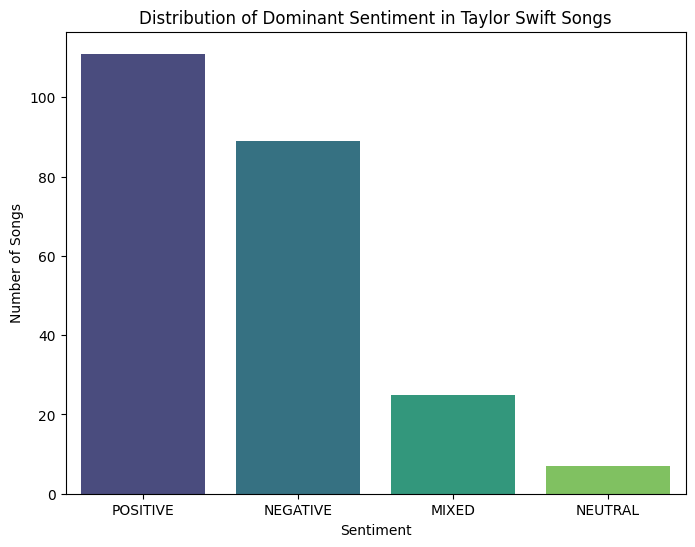

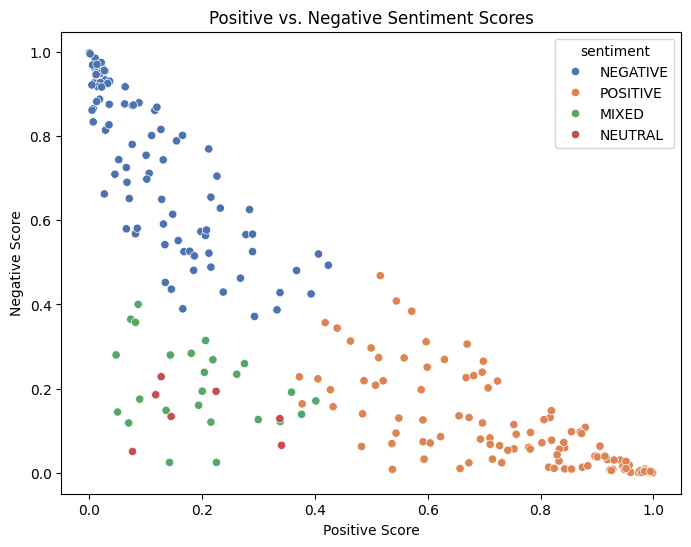

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/497179248.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='magma')


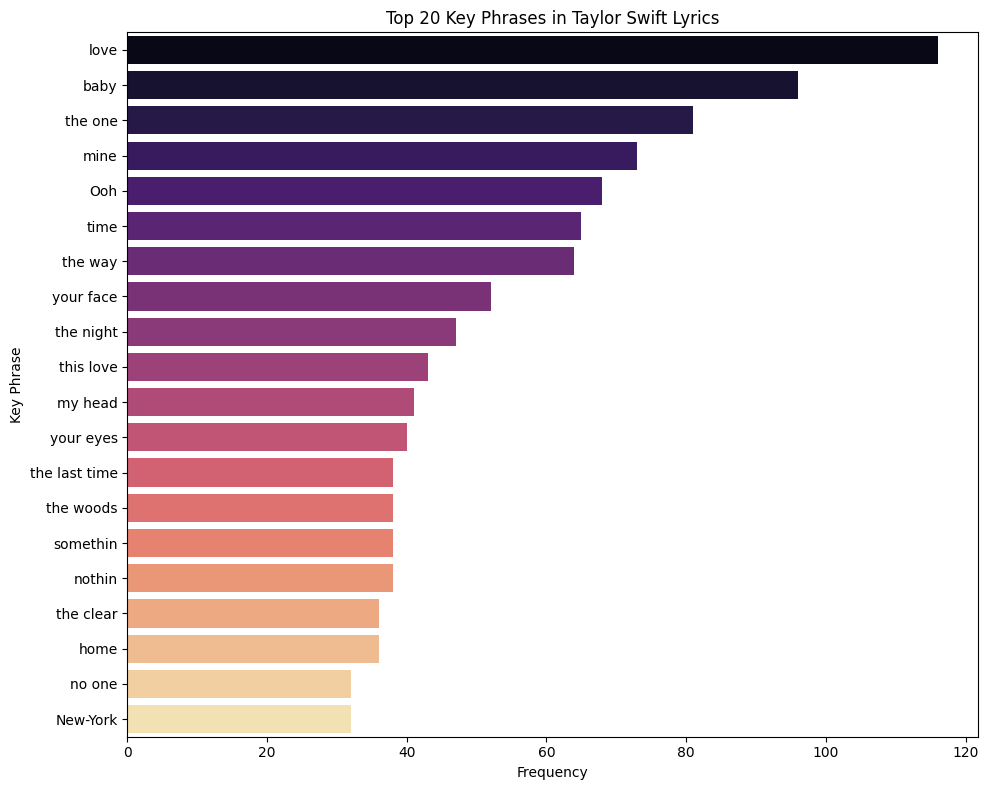

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/497179248.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.values, y=entity_counts.index, palette='coolwarm')


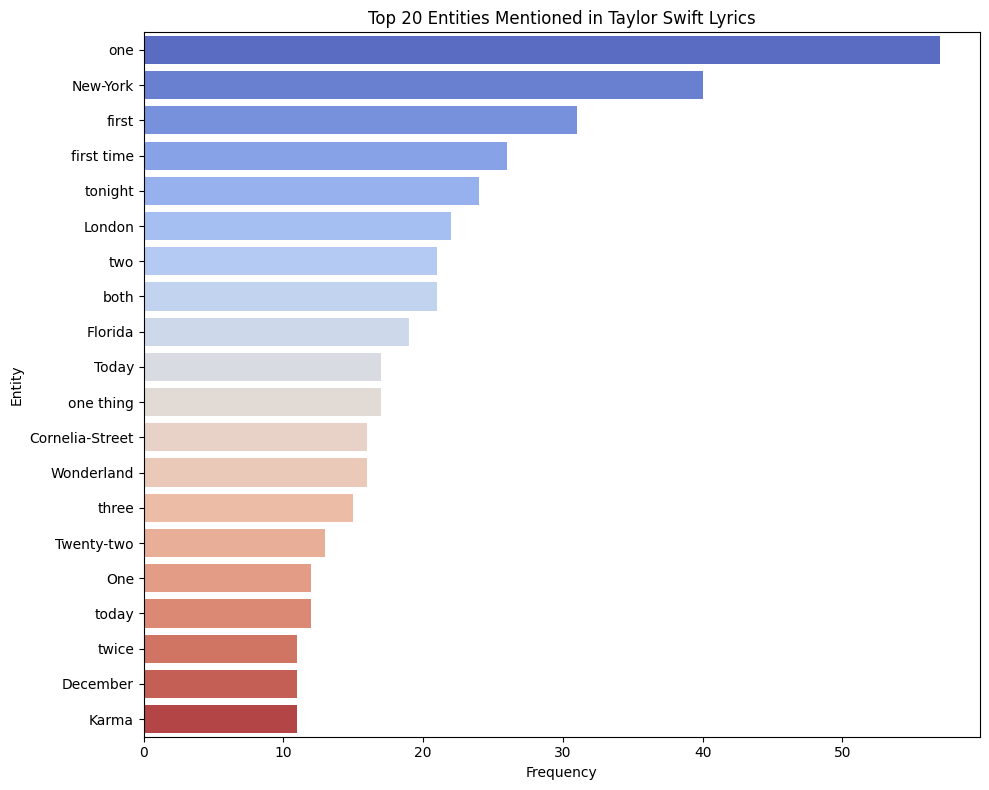

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(results)

# 'sentiment_scores' is a dictionary. Let's expand it into separate columns:
sentiment_df = pd.json_normalize(df['sentiment_scores'])
df = pd.concat([df.drop(columns=['sentiment_scores']), sentiment_df], axis=1)

# Now df has columns: file_name, sentiment, key_phrases, entities, Positive, Negative, Neutral, Mixed

# For visualization, let's focus on sentiment and sentiment scores.
print("DataFrame head:")
print(df.head())

# Count how many songs fall under each dominant sentiment
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Distribution of Dominant Sentiment in Taylor Swift Songs")
plt.xlabel("Sentiment")
plt.ylabel("Number of Songs")
plt.show()

# Scatter plot comparing positive vs negative sentiment
plt.figure(figsize=(8,6))
sns.scatterplot(x='Positive', y='Negative', data=df, hue='sentiment', palette='deep')
plt.title("Positive vs. Negative Sentiment Scores")
plt.xlabel("Positive Score")
plt.ylabel("Negative Score")
plt.show()

# Key phrases are lists. We can explore their frequency.
# Flatten all key phrases into a single list:
all_phrases = [phrase for kp_list in df['key_phrases'].dropna() for phrase in kp_list]
phrases_df = pd.DataFrame(all_phrases, columns=['phrase'])
phrase_counts = phrases_df['phrase'].value_counts().head(20)

plt.figure(figsize=(10,8))
sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='magma')
plt.title("Top 20 Key Phrases in Taylor Swift Lyrics")
plt.xlabel("Frequency")
plt.ylabel("Key Phrase")
plt.tight_layout()
plt.show()

# Entities are tuples (text, type). You can similarly analyze entity frequency or types.
all_entities = [ent for entity_list in df['entities'].dropna() for ent in entity_list]
entities_df = pd.DataFrame(all_entities, columns=['entity_text', 'entity_type'])
entity_counts = entities_df['entity_text'].value_counts().head(20)

plt.figure(figsize=(10,8))
sns.barplot(x=entity_counts.values, y=entity_counts.index, palette='coolwarm')
plt.title("Top 20 Entities Mentioned in Taylor Swift Lyrics")
plt.xlabel("Frequency")
plt.ylabel("Entity")
plt.tight_layout()
plt.show()

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  album_sentiments = df.groupby('album')[['Positive', 'Negative', 'Neutral', 'Mixed']].mean()


<Figure size 1200x800 with 0 Axes>

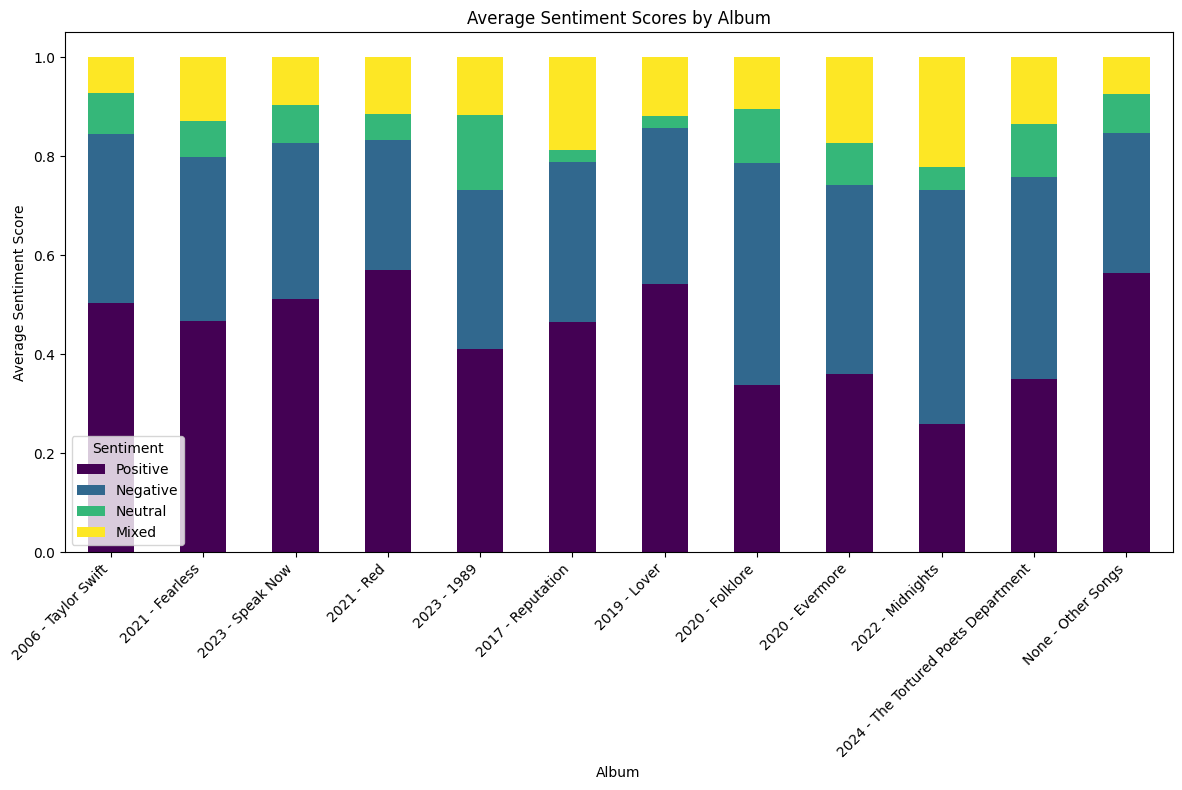

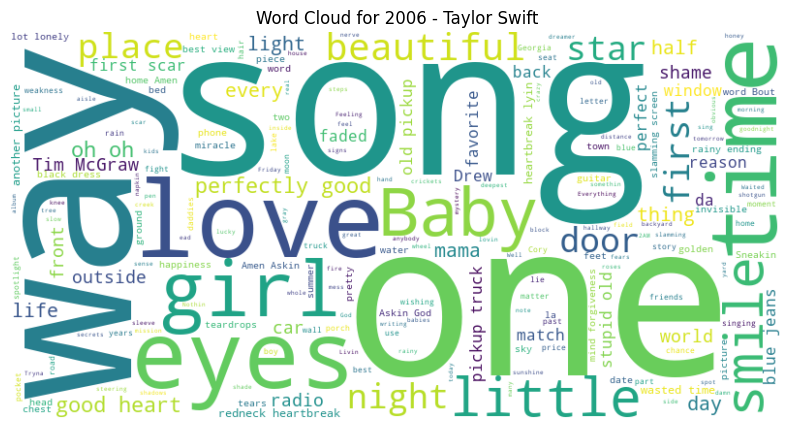

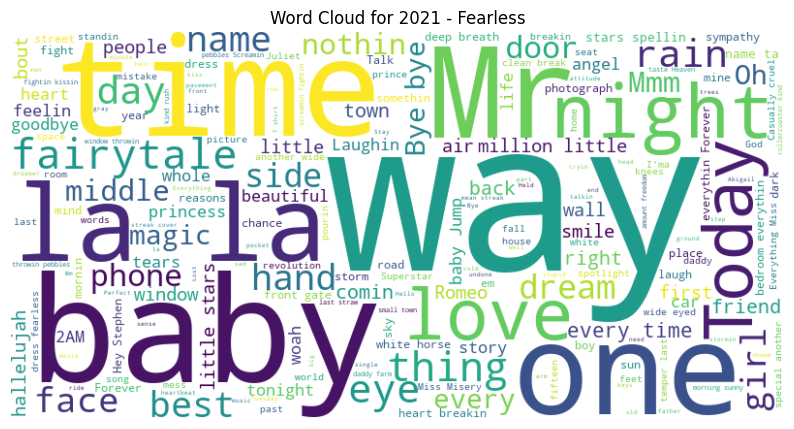

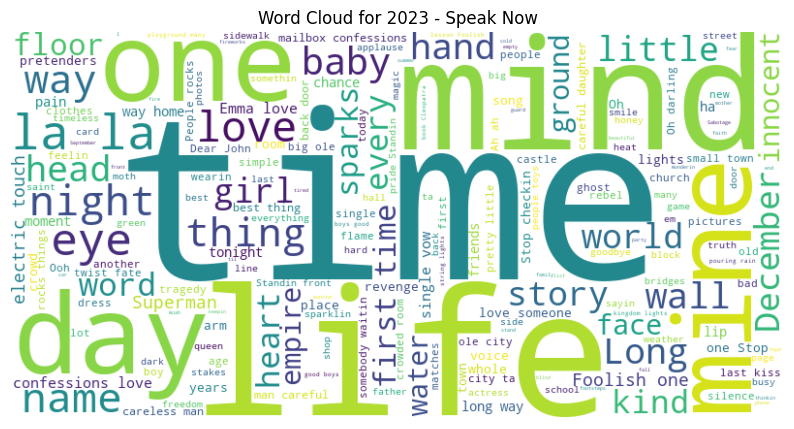

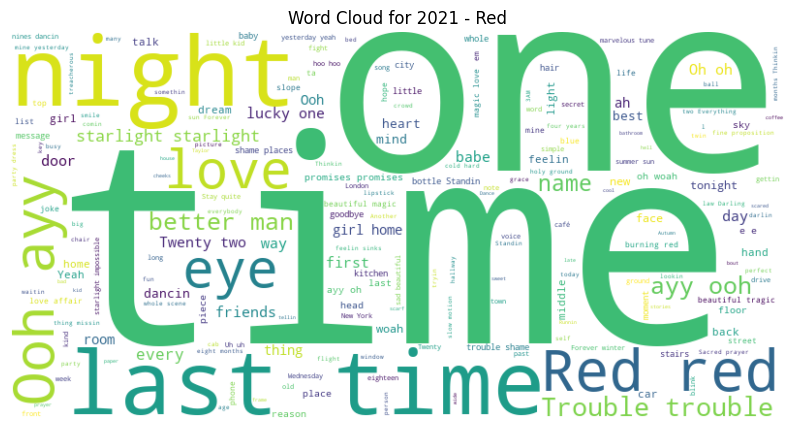

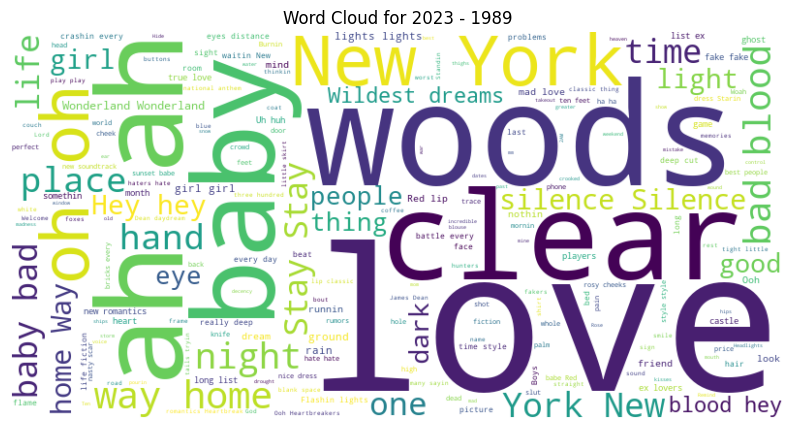

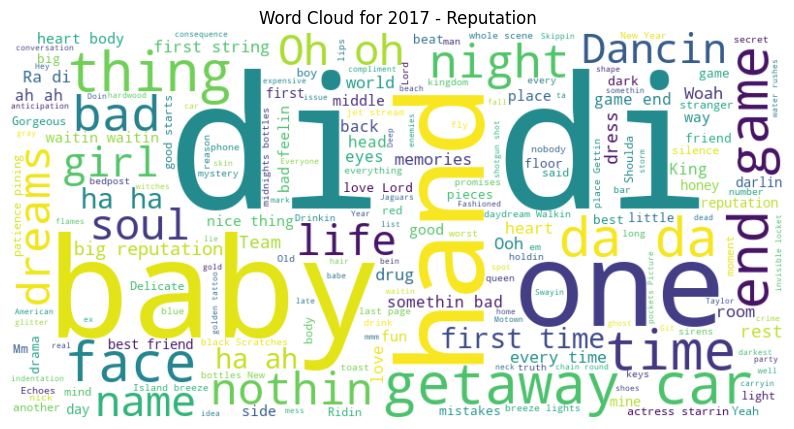

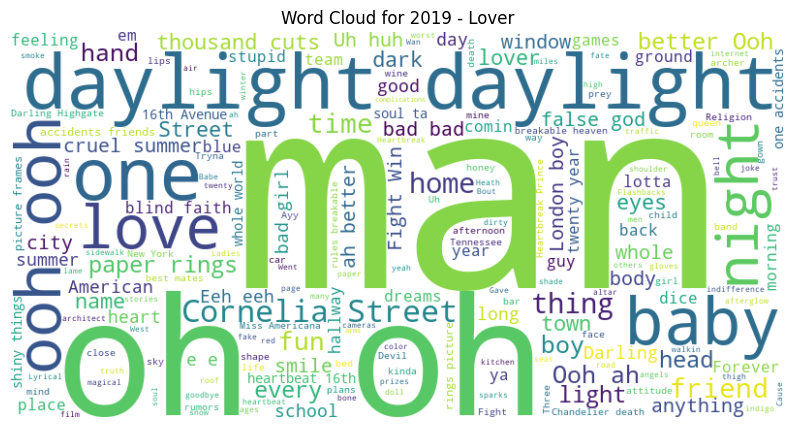

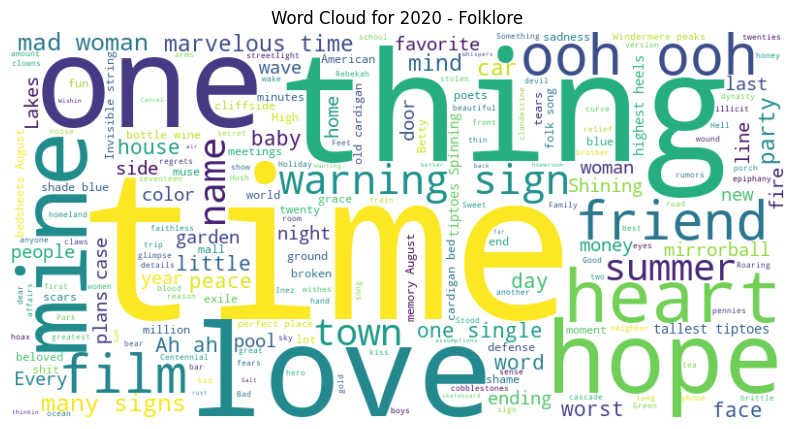

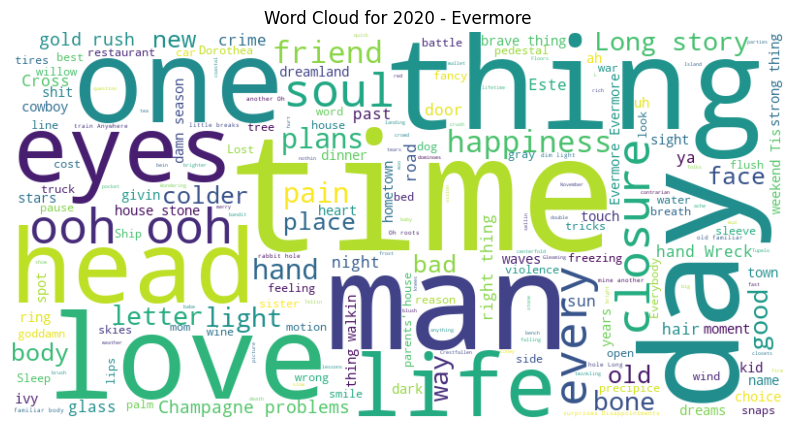

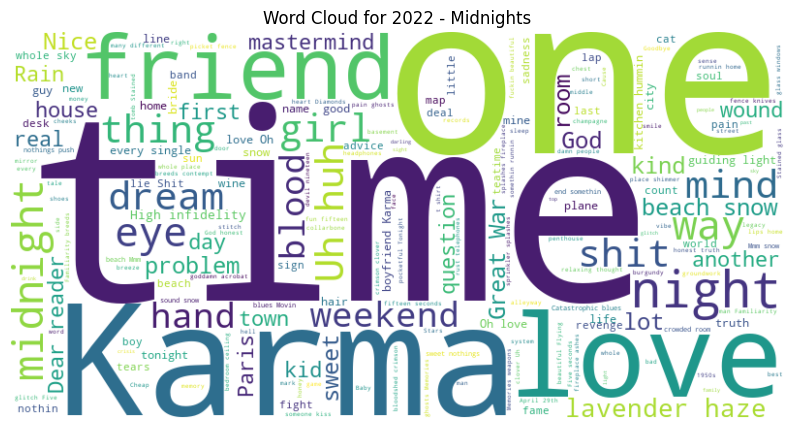

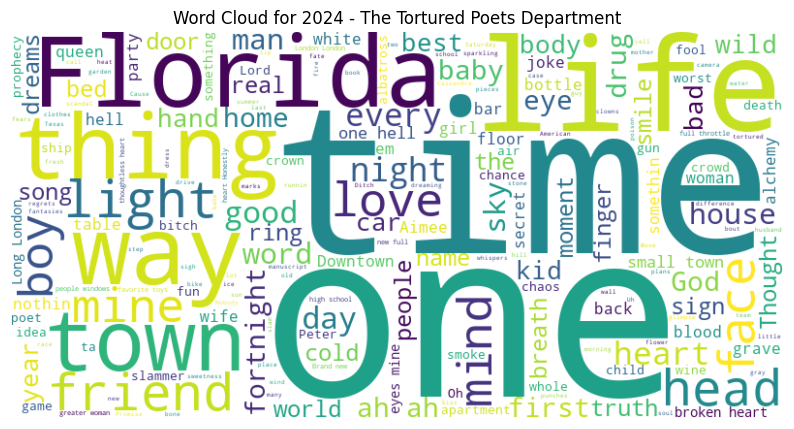

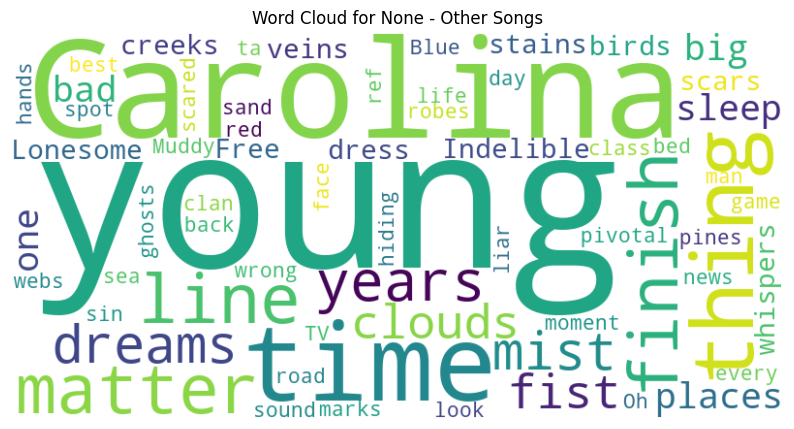

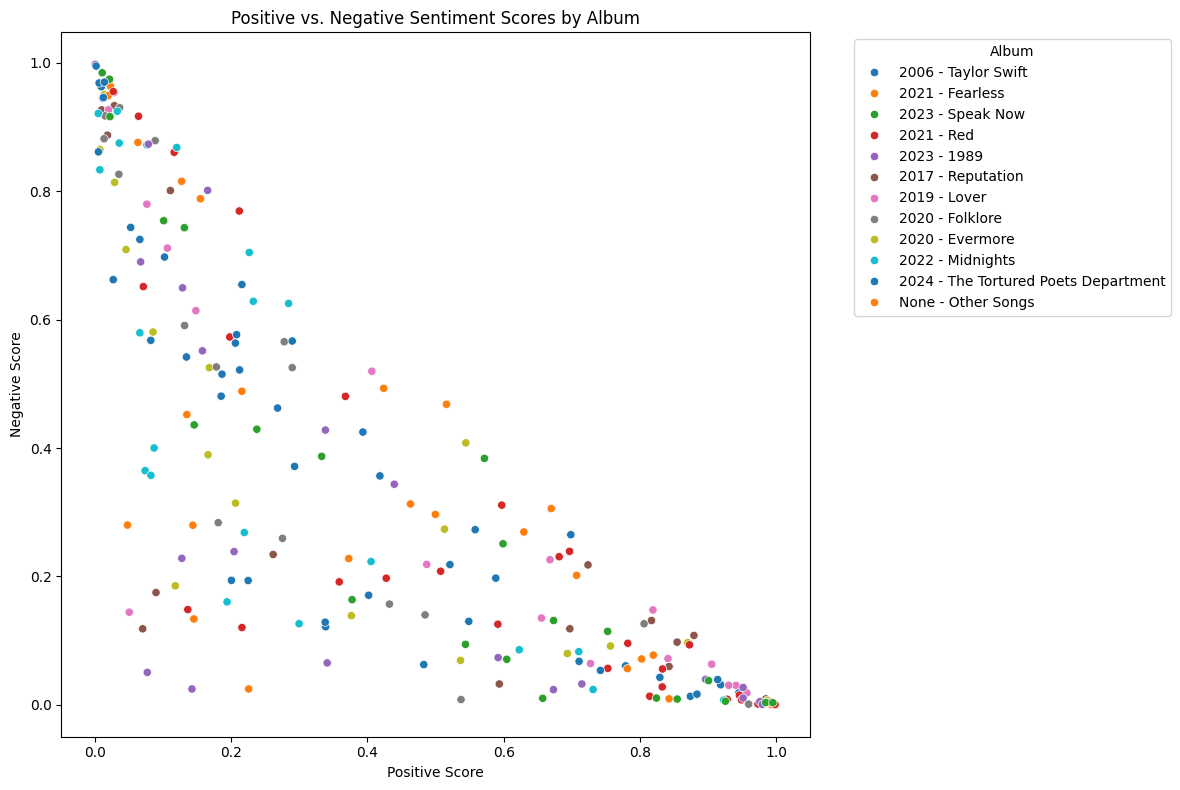

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


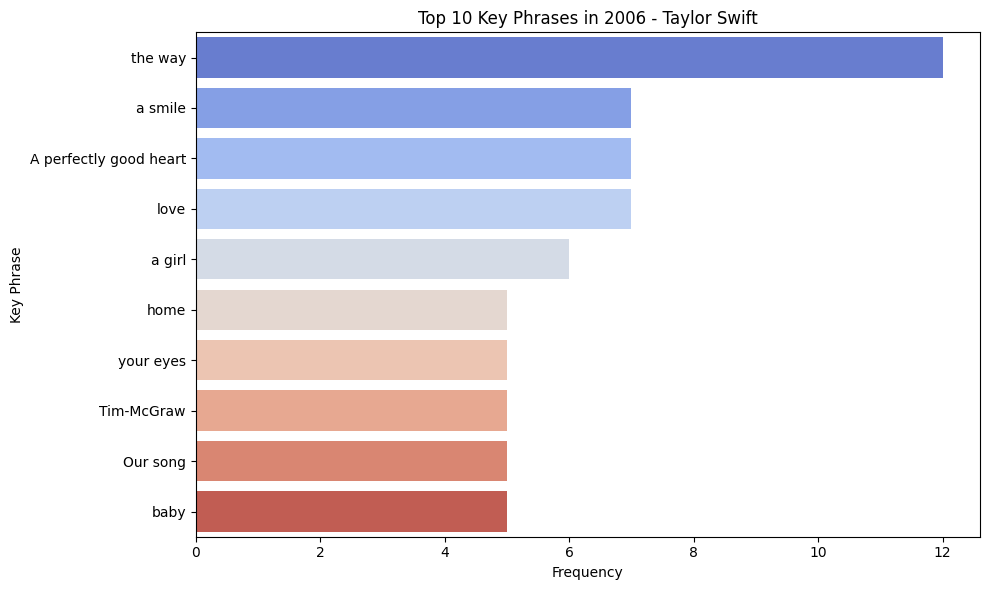

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


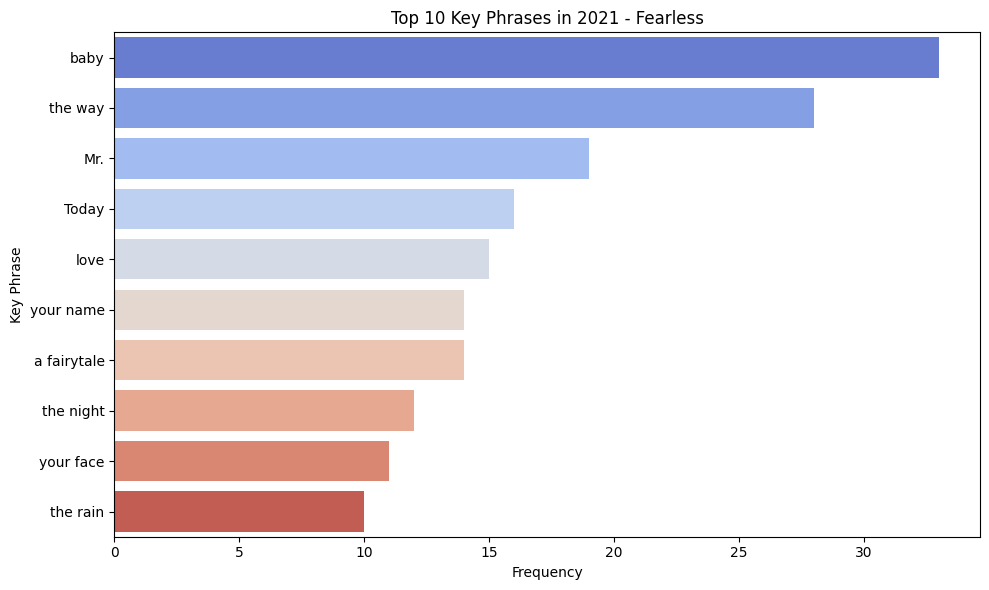

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


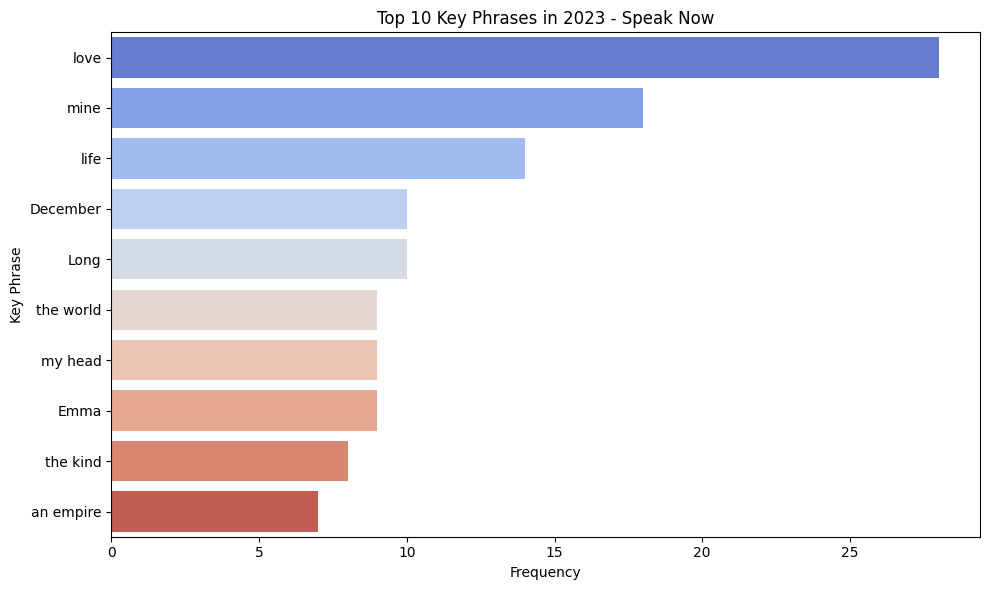

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


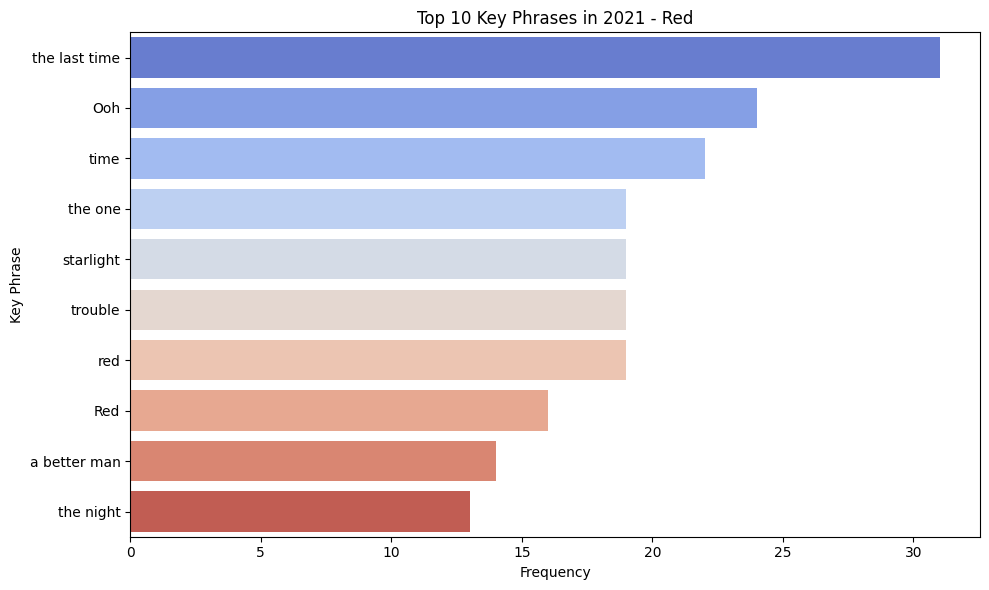

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


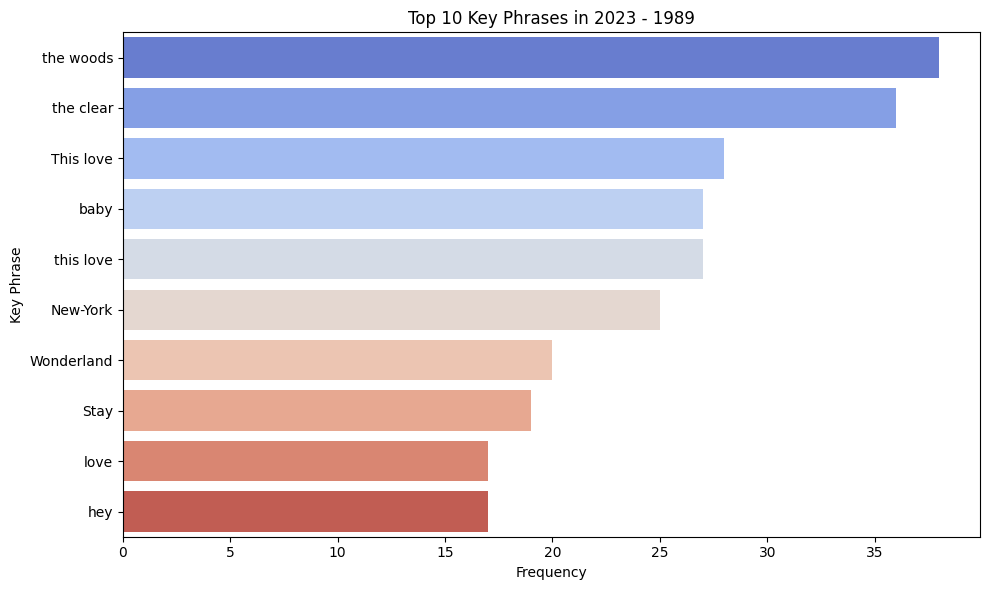

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


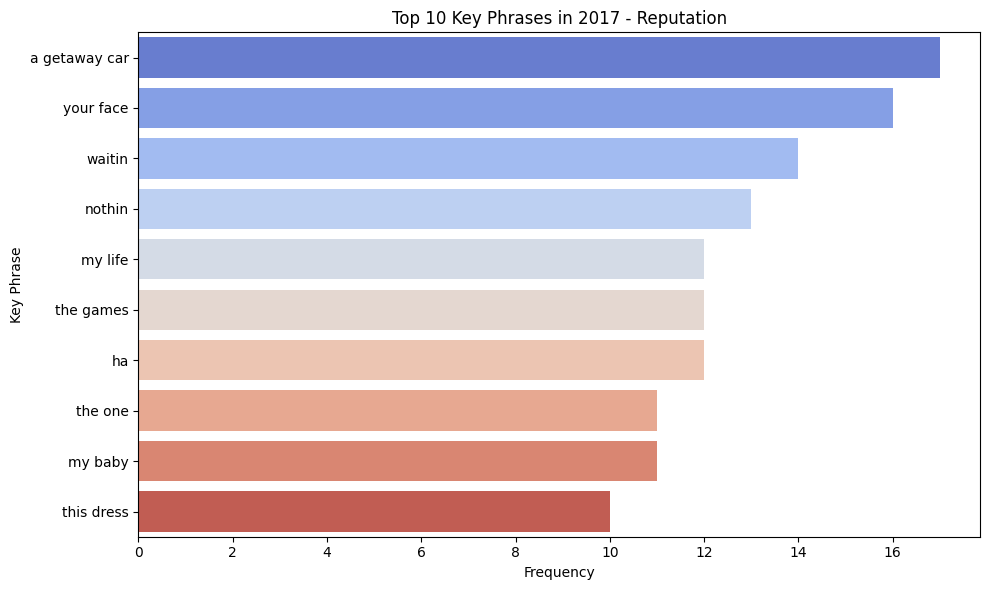

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


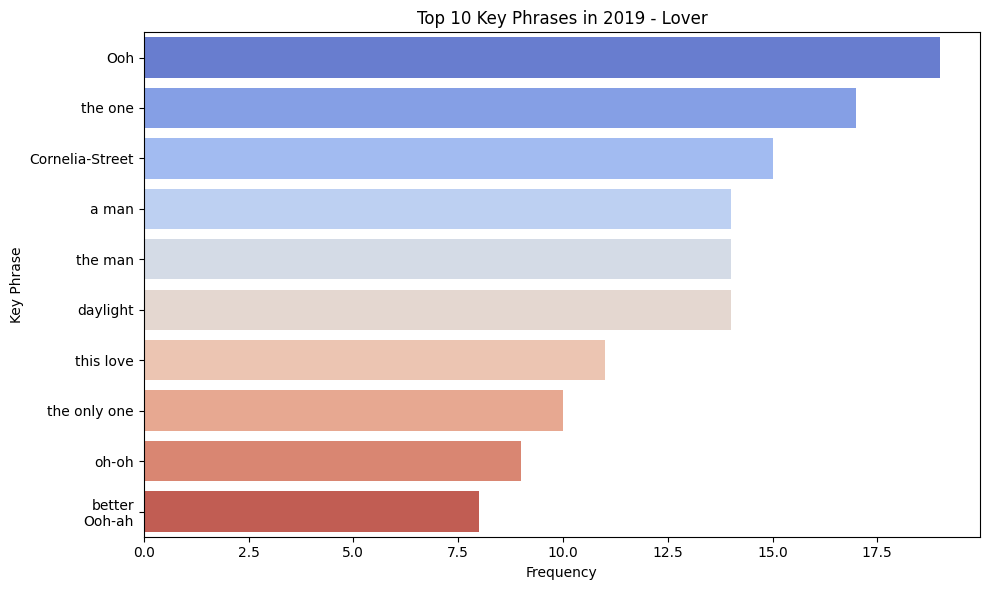

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


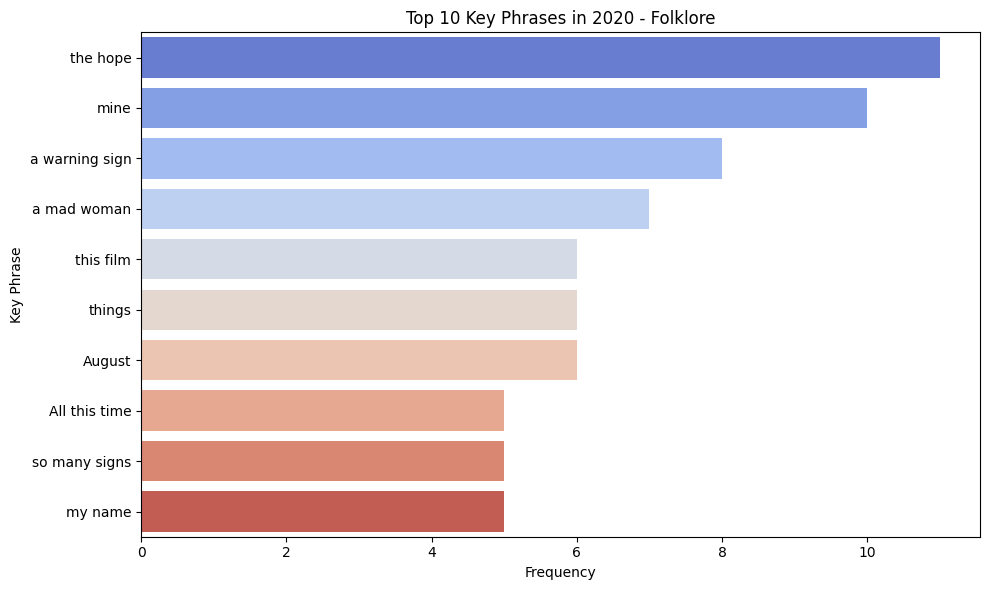

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


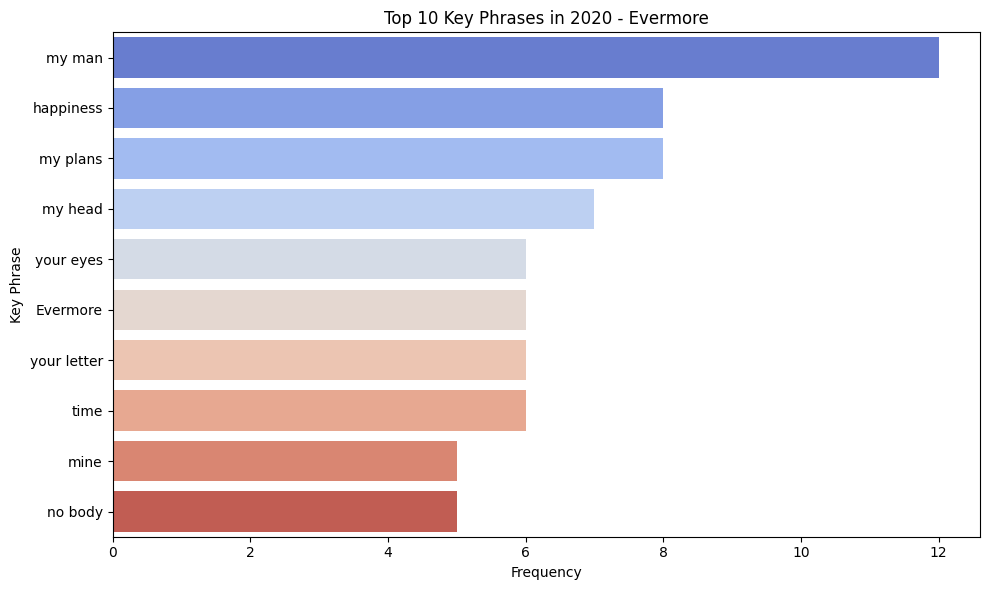

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


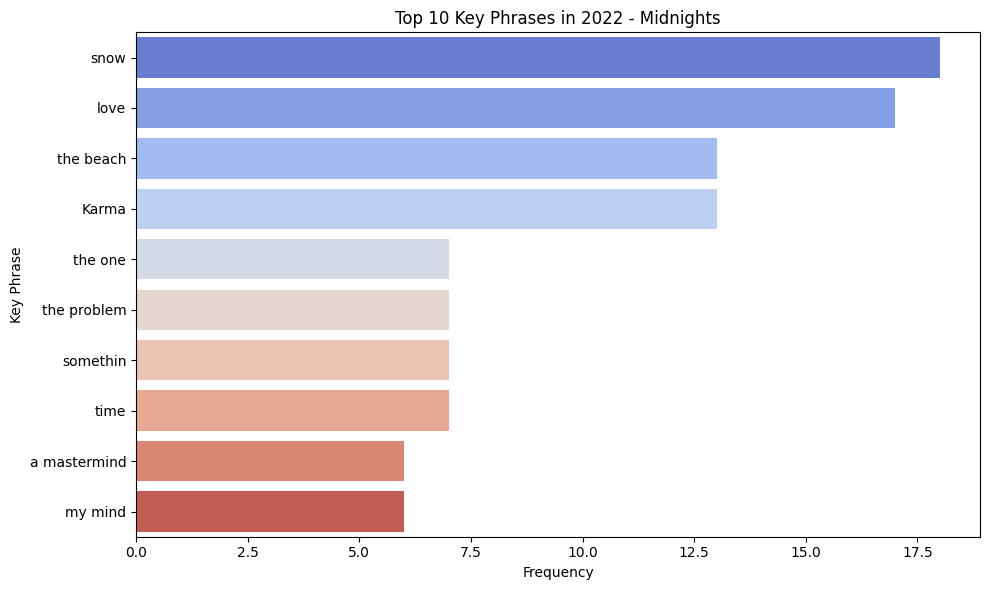

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


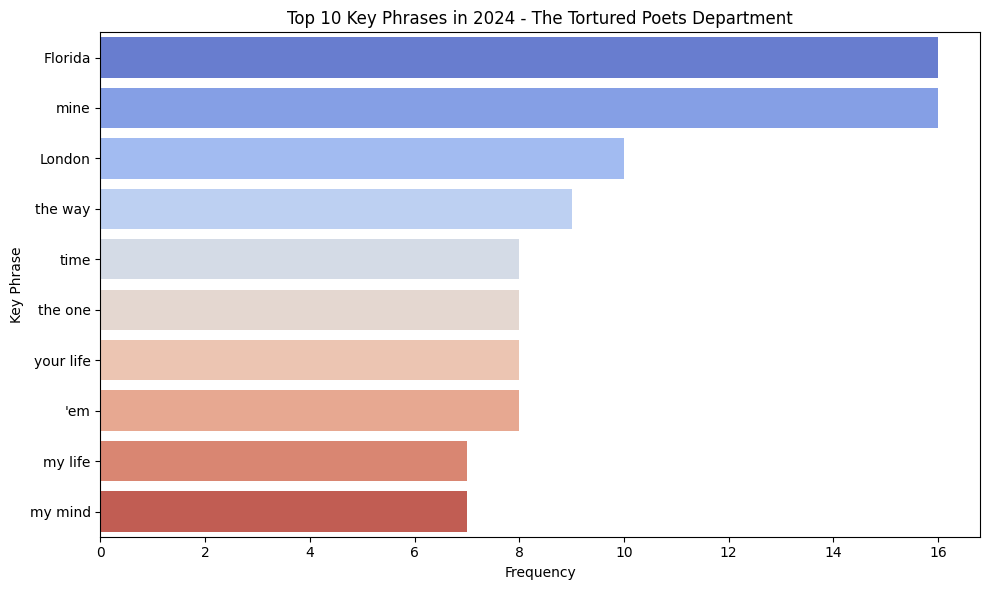

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/69148061.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')


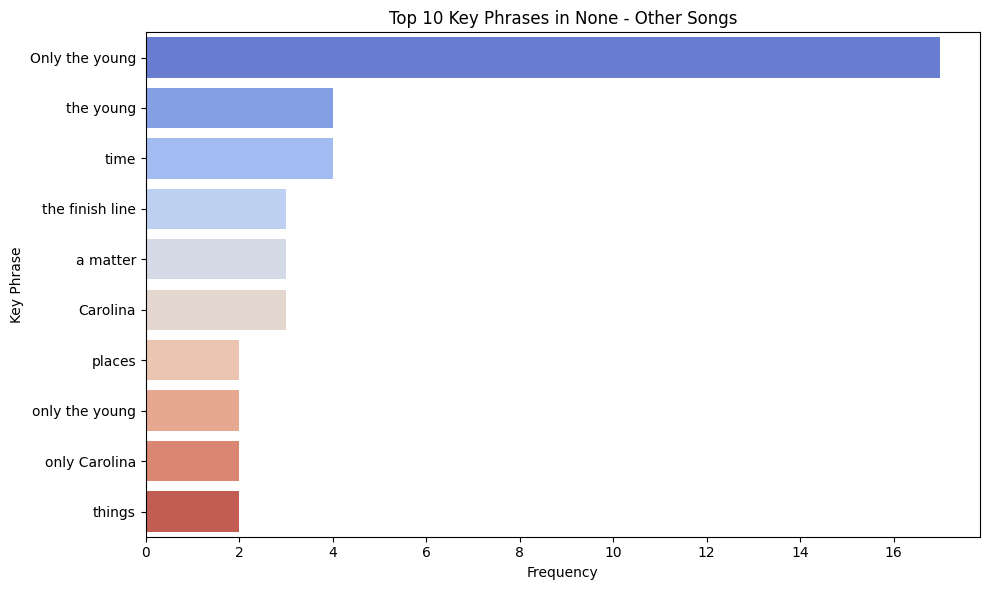

In [37]:
# Custom album order
album_order = ['2006 - Taylor Swift', '2021 - Fearless','2023 - Speak Now', '2021 - Red','2023 - 1989', '2017 - Reputation', '2019 - Lover',
       '2020 - Folklore', '2020 - Evermore', '2022 - Midnights', '2024 - The Tortured Poets Department',
       'None - Other Songs']

# Add a categorical column to enforce the custom order
df['album'] = pd.Categorical(df['album'], categories=album_order, ordered=True)

# Aggregate sentiment scores by album
album_sentiments = df.groupby('album')[['Positive', 'Negative', 'Neutral', 'Mixed']].mean()

# Bar plot for average sentiment scores across albums
plt.figure(figsize=(12, 8))
album_sentiments.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title("Average Sentiment Scores by Album")
plt.xlabel("Album")
plt.ylabel("Average Sentiment Score")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Aggregating and visualizing key phrases by album
all_album_phrases = {}

# Collect all key phrases for each album
for album in album_order:
    if album in df['album'].unique():
        album_phrases = df[df['album'] == album]['key_phrases'].dropna().sum()  # Flatten lists
        all_album_phrases[album] = album_phrases

# Generate word clouds for each album
from wordcloud import WordCloud

for album, phrases in all_album_phrases.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(phrases))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {album}")
    plt.show()

# Scatter plot to compare sentiment scores across albums
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Positive', y='Negative', hue='album', data=df, palette='tab10', hue_order=album_order)
plt.title("Positive vs. Negative Sentiment Scores by Album")
plt.xlabel("Positive Score")
plt.ylabel("Negative Score")
plt.legend(title="Album", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Top phrases by album
for album in album_order:
    if album in all_album_phrases:
        phrases_df = pd.DataFrame(all_album_phrases[album], columns=['phrase'])
        phrase_counts = phrases_df['phrase'].value_counts().head(10)  # Top 10 key phrases
        plt.figure(figsize=(10, 6))
        sns.barplot(x=phrase_counts.values, y=phrase_counts.index, palette='coolwarm')
        plt.title(f"Top 10 Key Phrases in {album}")
        plt.xlabel("Frequency")
        plt.ylabel("Key Phrase")
        plt.tight_layout()
        plt.show()


10 Most Positive Songs:
                                             file_name  Positive  Negative  \
90               ts/2021 - Fearless/Jump Then Fall.txt  0.999413  0.000134   
125                        ts/2021 - Red/Starlight.txt  0.998205  0.000327   
191              ts/2023 - Speak Now/Never Grow Up.txt  0.995071  0.003213   
38                      ts/2019 - Lover/London Boy.txt  0.993024  0.000387   
101               ts/2021 - Fearless/We Were Happy.txt  0.992559  0.000689   
122                            ts/2021 - Red/Ronan.txt  0.991929  0.003659   
73                   ts/2020 - Folklore/Mirrorball.txt  0.988099  0.003724   
49                      ts/2020 - Evermore/Closure.txt  0.987019  0.006906   
10   ts/2006 - Taylor Swift/Teardrops On My Guitar.txt  0.985728  0.002367   
15      ts/2017 - Reputation/Call It What You Want.txt  0.984909  0.009212   

      Neutral     Mixed  
90   0.000300  0.000153  
125  0.001458  0.000010  
191  0.001166  0.000550  
38   0.006011

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/2141732887.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


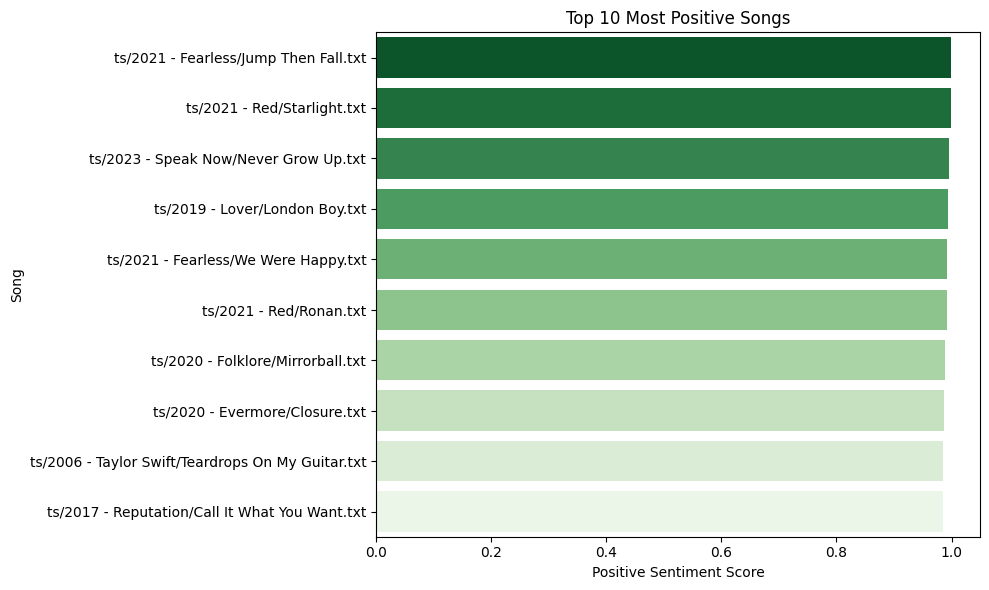

/var/folders/b4/358ffv012ks3tjt_mx39xxxw0000gn/T/ipykernel_85973/2141732887.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


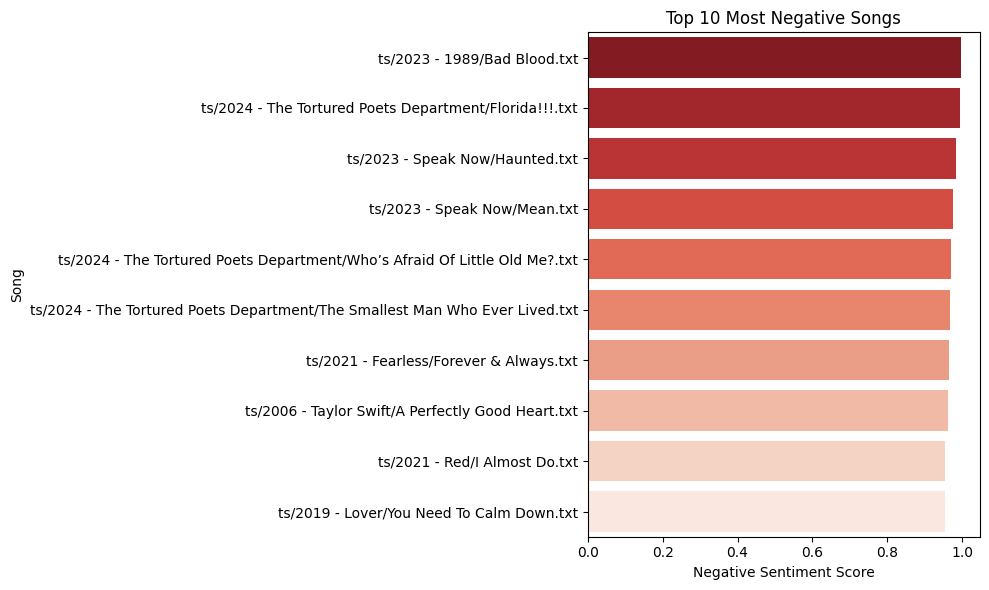

In [38]:
import pandas as pd

# Sort songs by Positive score
most_positive_songs = df.sort_values(by='Positive', ascending=False).head(10)

# Sort songs by Negative score
most_negative_songs = df.sort_values(by='Negative', ascending=False).head(10)

# Display the results
print("10 Most Positive Songs:")
print(most_positive_songs[['file_name', 'Positive', 'Negative', 'Neutral', 'Mixed']])

print("\n10 Most Negative Songs:")
print(most_negative_songs[['file_name', 'Positive', 'Negative', 'Neutral', 'Mixed']])

# Visualization: Bar plot for most positive songs
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Positive',
    y='file_name',
    data=most_positive_songs,
    palette='Greens_r'
)
plt.title("Top 10 Most Positive Songs")
plt.xlabel("Positive Sentiment Score")
plt.ylabel("Song")
plt.tight_layout()
plt.show()

# Visualization: Bar plot for most negative songs
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Negative',
    y='file_name',
    data=most_negative_songs,
    palette='Reds_r'
)
plt.title("Top 10 Most Negative Songs")
plt.xlabel("Negative Sentiment Score")
plt.ylabel("Song")
plt.tight_layout()
plt.show()
